# Customising `matplotlib` output

## Overview
- **Teaching:** 10 min
- **Exercises:** 10 min

**Questions**
* 
* 

**Objectives**
* 
* 
* 

In [1]:
## Should probably explain this voodoo:
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

## Making it prettier

While it's useful to be able to quickly plot any data we have in front of us, matplotlib's power comes from its configurability. Let's experiment with a dataset and see how much we can change the plot.

We'll start with a simple `DataFrame` contianing two columns, one with the values of a cosine, the other with the values of a sine.

Sinc:
$$\text{sinc}(x):=\frac{\sin(\pi x)}{\pi x}$$

In [2]:
x = np.linspace(-5, 5, 1000)
# sinc(x) is defined to be sin(pi*x)/(pi*x) in numpy
y_sinc = np.sinc(x)

Try to explain inline `matplotlib` oddities

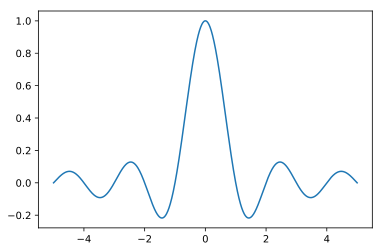

In [3]:
plt.plot(x, y_sinc)

You can see that it has plotted the sine and cosine curves between $\pi$ and $-\pi$. Now, let's go through and see how we can affect the display of this plot.

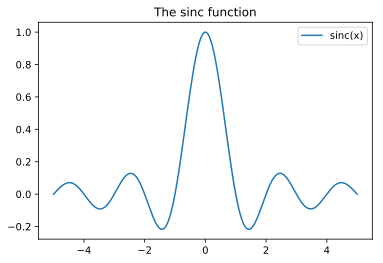

In [4]:
plt.plot(x, y_sinc, label='sinc(x)')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend()
plt.show()

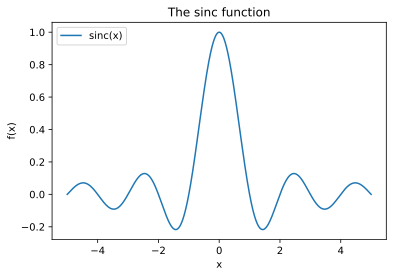

In [5]:
plt.plot(x, y_sinc, label='sinc(x)')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Setting limits

Current limits of the figure are a bit too tight and we want to make some space in order to clearly see all data points.

Sinc x is bounded above and below by the two functions
$\frac{1}{\pi x}$ and $\frac{-1}{\pi x}$

In [6]:
# sinc(x) bounded by plus/minus 1/(pi*x)
y_above = 1/(np.pi*x)
y_below = -1/(np.pi*x)

# mask out very large values
y_above = np.ma.masked_outside(y_above, -60, 60)
y_below = np.ma.masked_outside(y_below, -60, 60)

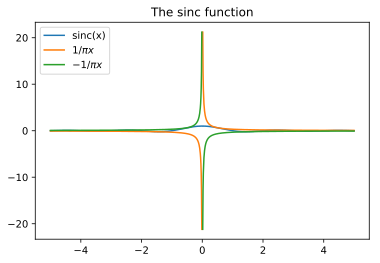

In [7]:
plt.plot(x, y_sinc, label='sinc(x)')
plt.plot(x, y_above, label='$1/\pi x$')
plt.plot(x, y_below, label='$-1/\pi x$')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.show()

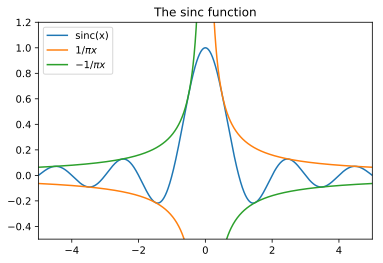

In [8]:
plt.plot(x, y_sinc, label='sinc(x)')
plt.plot(x, y_above, label='$1/\pi x$')
plt.plot(x, y_below, label='$-1/\pi x$')

# Set new limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.show()

### Changing colours and line widths

First step, we want to have the cosine in blue and the sine in red and a slighty thicker line for both of them.

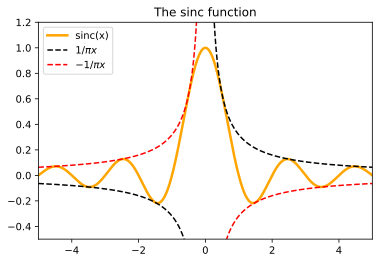

In [9]:
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-")
plt.plot(x, y_above, 'k--',label='$1/\pi x$')
plt.plot(x, y_below, 'r--', label='$-1/\pi x$')

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.show()

### Setting ticks

Current ticks are not ideal because they do not show the interesting values ($\pm\pi$,$\pm\frac{\pi}{2}$) for sine and cosine. We’ll change them such that they show only these values.

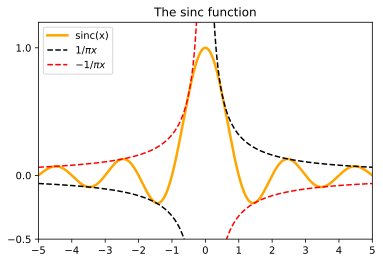

In [10]:
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-")
plt.plot(x, y_above, 'k--',label='$1/\pi x$')
plt.plot(x, y_below, 'r--', label='$-1/\pi x$')

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 1])

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.show()

### Setting tick labels

IS THIS NECESSARY???

Ticks are now properly placed but their label is not very explicit. We could guess that 3.142 is $\pi$ but it would be better to make it explicit. When we set tick values, we can also provide a corresponding label in the second argument list. Note that we’ll use LaTeX to allow for nice rendering of the label.

```python
trig.cos.plot(color="blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="red", linewidth=2.5, linestyle="-")

plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)

### New code
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])
### End of new code

plt.show()
```

### Moving spines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We’ll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll discard the top and right by setting their color to none and we’ll move the bottom and left ones to coordinate 0 in data space coordinates.

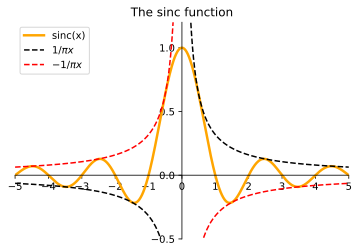

In [19]:
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-")
plt.plot(x, y_above, 'k--',label='$1/\pi x$')
plt.plot(x, y_below, 'r--', label='$-1/\pi x$')

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 0.5, 1])

# Move the axis spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.show()

### Adding a legend

JUST MENTION PLACEMENT EARLIER

Let’s add a legend in the upper left corner. This only requires adding the keyword argument label (that will be used in the legend box) to the plot commands.

```python
trig.cos.plot(color="blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="red", linewidth=2.5, linestyle="-")

plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

### New code
plt.legend(loc='upper left')
### End of new code

plt.show()
```

### Annotate some points

Let’s annotate some interesting points using the annotate command. We chose the $\frac{2}{3}\pi$ value and we want to annotate both the sine and the cosine. We’ll first draw a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.

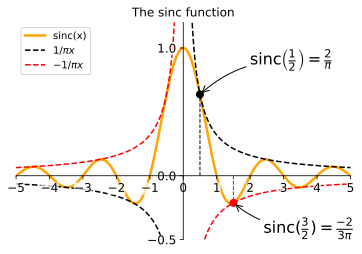

In [18]:
# NB: We had to introduce a zorder parameter here
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-", zorder=0)
plt.plot(x, y_above, 'k--',label='$1/\pi x$', zorder=0.1)
plt.plot(x, y_below, 'r--', label='$-1/\pi x$', zorder=0.1)

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 1])

# Move the axis spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Annotate the graph
t = 0.5
plt.plot([t, t], [0, np.sinc(t)], color='black', linewidth=1, linestyle="--")
plt.scatter([t], [np.sinc(t)], 50, color='black')

plt.annotate(r'sinc$\left(\frac{1}{2}\right)=\frac{2}{\pi}$',
             xy=(t, np.sinc(t)), xycoords='data',
             xytext=(50, 30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

s = 1.5
plt.plot([s, s],[0, np.sinc(s)], color='red', linewidth=1, linestyle="--")
plt.scatter([s],[np.sinc(s)], 50, color='red')

plt.annotate(r'sinc$(\frac{3}{2})=\frac{-2}{3\pi}$',
             xy=(s, np.sinc(s)), xycoords='data',
             xytext=(30, -30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7))
    
# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.show()

Now you know how to make different modifications to your plots we can make some of these changes to our temerature data.

## Saving plot to a file

You can take any plot you've created within Jupyter and save it to a file on disk using the `plt.savefig()` function. You give the function the name of the file to create and it will use whatever format is specified by the name.

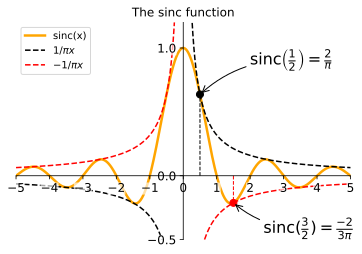

In [13]:
# NB: We had to introduce a zorder parameter here
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-", zorder=0)
plt.plot(x, y_above, 'k--',label='$1/\pi x$', zorder=0.1)
plt.plot(x, y_below, 'r--', label='$-1/\pi x$', zorder=0.1)

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 1])

# Move the axis spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Annotate the graph
t = 0.5
plt.plot([t, t], [0, np.sinc(t)], color='black', linewidth=1, linestyle="--")
plt.scatter([t], [np.sinc(t)], 50, color='black')

plt.annotate(r'sinc$\left(\frac{1}{2}\right)=\frac{2}{\pi}$',
             xy=(t, np.sinc(t)), xycoords='data',
             xytext=(50, 30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

s = 1.5
plt.plot([s, s],[0, np.sinc(s)], color='red', linewidth=1, linestyle="--")
plt.scatter([s],[np.sinc(s)], 50, color='red')

plt.annotate(r'sinc$(\frac{3}{2})=\frac{-2}{3\pi}$',
             xy=(s, np.sinc(s)), xycoords='data',
             xytext=(30, -30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.65))

# Set title and legend, then SAVE plot
plt.title('The sinc function')
plt.legend(loc='upper left')
#plt.show()

# Save final plot
plt.savefig('../images/sinc.png')
#You don't need to save in this folder you could just use:
#plt.savefig('sinc.png')

You can then display the figure in Jupyter with `![](sinc.png)`

![](../images/sinc.png)

## Key Points
* 
* 
* 
* 